**<H1>Versuch 366: Prismen-Spektralapparat</H1>**

In [ ]:
import sys
import os
import sympy as sp
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
import setup_paths

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from tabelle import tabellen_ersteller
from geraden_fit_config import config_1

<H2>Versuchsteil 1: Ausrichten und Vermessen</H2>

**<H4>366.a:** Apperturmessung</H4>

Die Appertur wurde auf $Appertur \pm \Delta Appertur = (0.5 \pm 0.3) \, mm$ bestimmt.

Die Linsenbreite beträgt $b_{Linse} \pm \Delta b_{Linse} = (1.6 \pm 0.3) \, cm$

Der Auftrittwinkel $\alpha$ lässt sich über den in 366.c gemessenen Ablenkwert $\delta_{grün}$ bestimmen:

$\alpha=90-((\gamma+\delta)/2)$

Die Auftrittsbreite $b_{auf}$ ist dann:

$b_{auf}=Appertur/\sin(\alpha)$

Und die Basisbreite berechnet sich zu:

$B=2 \cdot b_{auf} \cdot\sin(\gamma/2)=2 \cdot Appertur/\sin(\alpha) \cdot\sin(\gamma/2)=2 \cdot Appertur/\sin(90-((\gamma+\delta)/2)) \cdot\sin(\gamma/2)$

In [122]:
var_names=[A, gamma, delta]=sp.symbols('A gamma delta')
formula=2*A/sp.sin(90-((gamma+delta)/2))*sp.sin(gamma/2)
gaussian_error_propagation(formula, ((A,1.6e-2,0.3e-2),(gamma,59.94*sp.pi/180,0.03*sp.pi/180),(delta,50.10*sp.pi/180,0.05*sp.pi/180)))

Formel: -2*A*sin(gamma/2)/sin(delta/2 + gamma/2 - 90)
Werte: ((A, 0.016, 0.003), (gamma, 0.333*pi, 0.000166666666666667*pi), (delta, 0.278333333333333*pi, 0.000277777777777778*pi)) 

Formelwert: 0.0181725570251923

Fehlerformel: sqrt((-2*del_A*sin(gamma/2)/sin(delta/2 + gamma/2 - 90))**2 + (del_gamma*(A*sin(gamma/2)*cos(delta/2 + gamma/2 - 90)/sin(delta/2 + gamma/2 - 90)**2 - A*cos(gamma/2)/sin(delta/2 + gamma/2 - 90)))**2 + (A*del_delta*sin(gamma/2)*cos(delta/2 + gamma/2 - 90)/sin(delta/2 + gamma/2 - 90)**2)**2)
Fehler: 0.00340737432738901 
Ergebnis: 0.018±0.003
Das Ergebnis hat eine Genauigkeit von 16.667%


**<H4>366.b:** Messung der Nullage $\alpha_0$ und der dem Winkel $\gamma$ der brechenden Kante</H4>

In [19]:
# Nullage:
alpha_0=(358.5+15/60)-360
err_alpha_0=0.04

print(f'Die Nullage liegt bei ({alpha_0} ± {err_alpha_0})°')

Die Nullage liegt bei (-1.25 ± 0.04)°


In [25]:
# Winkel der brechenden Kante:

var_names=[a1, a2, a0]=sp.symbols('a1 a2 a0')
formula=1/2*((a1-a0)-(a2-a0)) #a0 hier irrelevant
gaussian_error_propagation(formula, ((a1,63.15,0.04),(a2,-56.73,0.04),(a0,-1.25,0.04)))

Formel: 0.5*a1 - 0.5*a2
Werte: ((a1, 63.15, 0.04), (a2, -56.73, 0.04), (a0, -1.25, 0.04)) 

Formelwert: 59.9400000000000

Fehlerformel: sqrt((0.5*del_a1)**2 + (-0.5*del_a2)**2 + (0)**2)
Fehler: 0.0282842712474619 
Ergebnis: 59.94±0.03
Das Ergebnis hat eine Genauigkeit von 0.05%


**<H4>366.c:** Erstellung der Kalibrationskurve</H4>

In [ ]:
# Es muss nun 1/D_B für den Plot bestimmt werden
# var_names=[l, el, a, ea]=sp.symbols('l el a ea')
# formula_list=[
#     l,
# 	el,
# 	a,
# 	ea
#     ]
# evaluate_gaussian_error('c_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['lambda [nm]','err_lambda [nm]', 'alpha [deg]', 'err_alpha [deg]'], output_file_suffix='calc')

sqrt((del_l)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (del_el)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (del_a)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_ea)**2)
Zeile 1: [404.66, 0.0, 0.0, 0.0, 52.3, 0.0, 0.05, 0.0]
Zeile 2: [435.83, 0.0, 0.0, 0.0, 51.4, 0.0, 0.05, 0.0]
Zeile 3: [467.81, 0.0, 0.0, 0.0, 50.7333333333, 0.0, 0.05, 0.0]
Zeile 4: [479.99, 0.0, 0.0, 0.0, 50.55, 0.0, 0.05, 0.0]
Zeile 5: [508.58, 0.0, 0.0, 0.0, 50.1, 0.0, 0.05, 0.0]
Zeile 6: [546.08, 0.0, 0.0, 0.0, 49.6666666667, 0.0, 0.05, 0.0]
Zeile 7: [576.96, 0.0, 0.0, 0.0, 49.3333333333, 0.0, 0.05, 0.0]
Zeile 8: [579.06, 0.0, 0.0, 0.0, 49.2833333333, 0.0, 0.05, 0.0]
Zeile 9: [643.85, 0.0, 0.0, 0.0, 48.8666666667, 0.0, 0.05, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc.csv' gespeichert.


In [42]:
runden_und_speichern('c_mess_calc.csv')

Die gerundeten Daten wurden in der CSV-Datei "c_mess_calc_rounded.csv" gespeichert.


In [58]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[l, a]=sp.symbols('l a')
formula_list=[
    a,
	l
    ]
evaluate_gaussian_error('c_mess_calc_rounded.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]', 'lambda [nm]'], output_file_suffix='plot')

sqrt((0)**2 + (del_a)**2)
sqrt((del_l)**2 + (0)**2)
Zeile 1: [52.3, 0.05, 404.66, 0.0]
Zeile 2: [51.4, 0.05, 435.83, 0.0]
Zeile 3: [50.73, 0.05, 467.81, 0.0]
Zeile 4: [50.55, 0.05, 479.99, 0.0]
Zeile 5: [50.1, 0.05, 508.58, 0.0]
Zeile 6: [49.67, 0.05, 546.08, 0.0]
Zeile 7: [49.33, 0.05, 576.96, 0.0]
Zeile 8: [49.28, 0.05, 579.06, 0.0]
Zeile 9: [48.87, 0.05, 643.85, 0.0]
Auswertung abgeschlossen. Ergebnisse wurden in 'c_mess_calc_rounded_plot.csv' gespeichert.


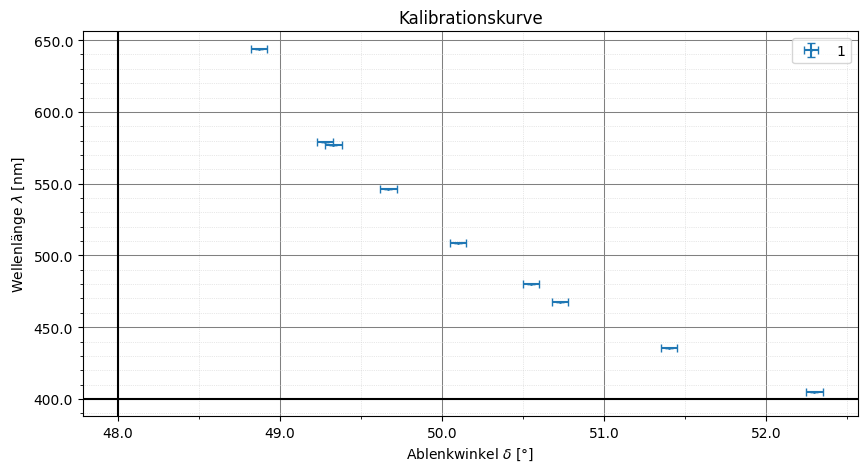

In [ ]:
geraden_fit('c_mess_calc_rounded_plot.csv', title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			save=False, linear_fit=False, focus_point=False, plot_y_inter=False, legendlocation='best', y_axis=48, x_axis=400,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5)

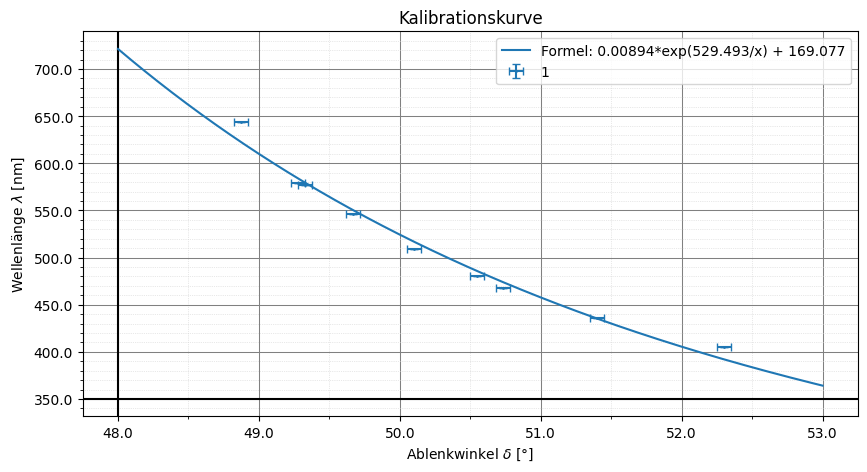

In [8]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 53)

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('c_mess_calc_rounded_plot.csv', config, plot_formula=True, title='Kalibrationskurve', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			 y_axis=48, x_axis=350, linear_fit=False, focus_point=False,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True, )

Diese fit-Kurve besitzt eine Standardabweichung von $\sigma \approx 9,327$

<H2>Versuchsteil 2: Bestimmung eines unbekannten Elements</H2>

**<H4>366.d:** Lampe 5</H4>

In [8]:
# Winkelrechnung Lampe 5
var_names=[a1, a2]=sp.symbols('a1 a2')
formula_list=[
    360-(a1+a2/60)
    ]
evaluate_gaussian_error('d_mess.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['delta [deg]'], output_file_suffix='calc')
runden_und_speichern('d_mess_calc.csv')

sqrt((-del_a1)**2 + (-del_a2/60)**2)
Zeile 1: [48.8166666667, 0.05]
Zeile 2: [50.0666666667, 0.05]
Zeile 3: [50.45, 0.05]
Zeile 4: [50.7333333333, 0.05]
Zeile 5: [51.25, 0.05]
Auswertung abgeschlossen. Ergebnisse wurden in 'd_mess_calc.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "d_mess_calc_rounded.csv" gespeichert.


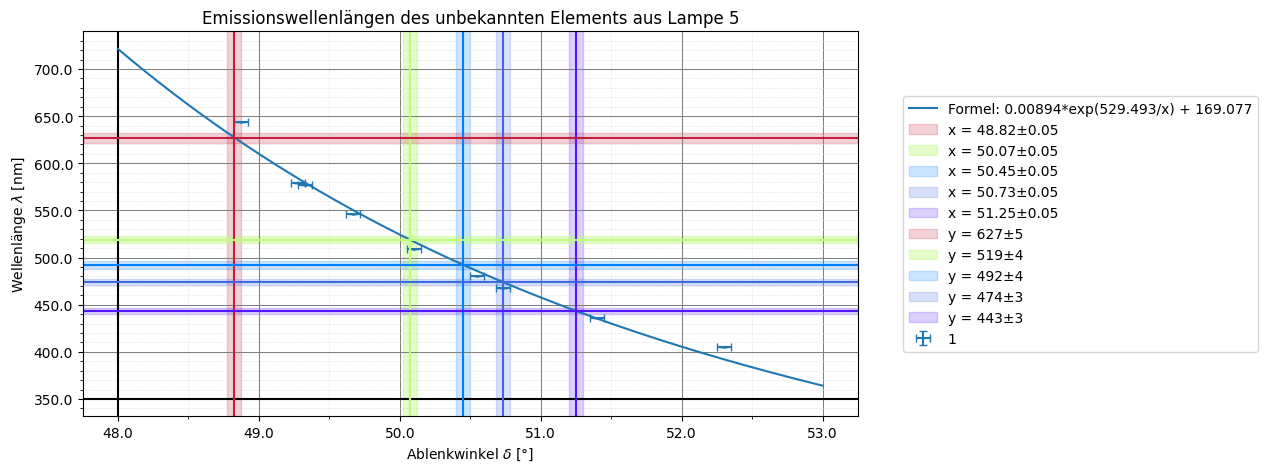

In [11]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 53)

mess_winkel=[(48.82,0.05, '#C41E3A'),
			 (50.07,0.05, '#BDFC7F', 0.4),
			 (50.45,0.05, '#007FFF'),
			 (50.73,0.05, '#4169E1'),
			 (51.25,0.05, '#5218FA')
			 ]

wellenlängen_res=[(627,5, '#C41E3A'),
			 (519,4, '#BDFC7F', 0.4),
			 (492,4, '#007FFF'),
			 (474,3, '#4169E1'),
			 (443,3, '#5218FA')
			 ]

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('c_mess_calc_rounded_plot.csv', config, plot_formula=True, title='Emissionswellenlängen des unbekannten Elements aus Lampe 5',
			y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			legendlocation='outside right', y_axis=48, x_axis=350, linear_fit=False, focus_point=False, x_lines=mess_winkel, y_lines=wellenlängen_res,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True)

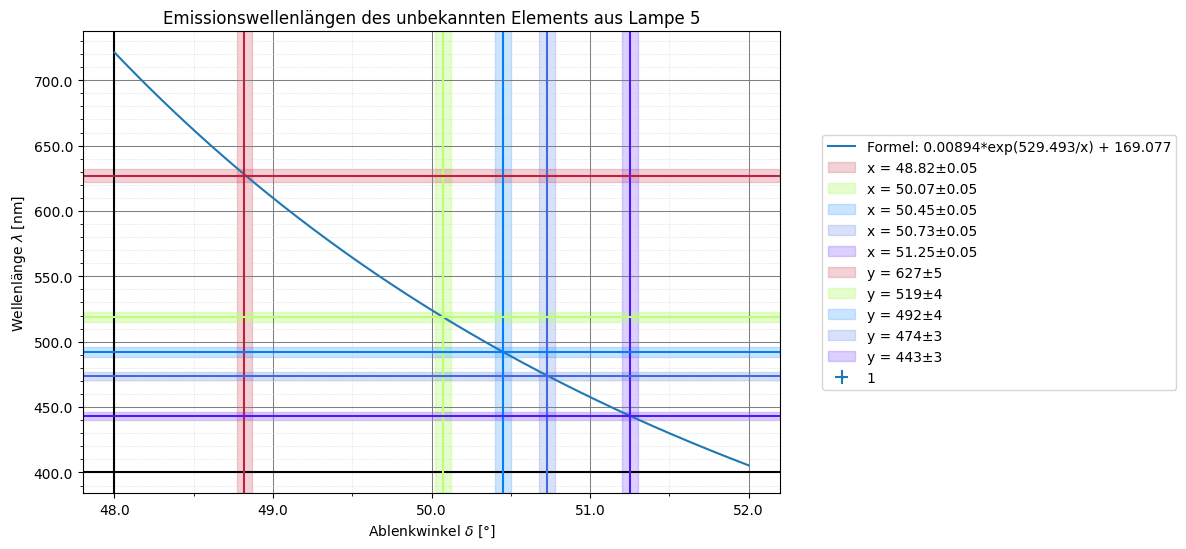

In [17]:
# Definiere die Symbole für die Formel
a, b, c, x = sp.symbols('a b c x')
var_names = [a, b, c, x]

# Definiere die Formel
formula = [a*sp.exp(b/x)+c]

# Definiere die Werte für die Variablen
values = [0.00894,529.493,169.077]

# Erstelle eine angepasste Konfiguration
config = config_1
config.plot_formula = True
config.formula = formula
config.var_names = var_names
config.formula_values = values
config.formula_x_range = (48, 52)

mess_winkel=[(48.82,0.05, '#C41E3A'),
			 (50.07,0.05, '#BDFC7F', 0.4),
			 (50.45,0.05, '#007FFF'),
			 (50.73,0.05, '#4169E1'),
			 (51.25,0.05, '#5218FA')
			 ]

wellenlängen_res=[(627,5, '#C41E3A'),
			 (519,4, '#BDFC7F', 0.4),
			 (492,4, '#007FFF'),
			 (474,3, '#4169E1'),
			 (443,3, '#5218FA')
			 ]

# Führe geraden_fit mit der angepassten Konfiguration aus
geraden_fit('d_inv_plot.csv', config, plot_formula=True, length=9, height=6,
			title='Emissionswellenlängen des unbekannten Elements aus Lampe 5', y_label=r'Wellenlänge $\lambda$ [nm]', x_label=r'Ablenkwinkel $\delta$ [°]',
			legendlocation='outside right', y_axis=48, x_axis=400, linear_fit=False, focus_point=False, x_lines=mess_winkel, y_lines=wellenlängen_res,
			y_major_ticks=50, y_minor_ticks=10, x_major_ticks=1, x_minor_ticks=0.5, save=True)

Diese Emissionswellenlängen passen zu denen von Cadmium

<H2>Versuchsteil 3: Beugung und Rayleigh-Kriterium</H2>

**<H4>366.e:** Bestimmung des Auflösungsvermögens $A$ und der auflösbaren Wellenlängendifferenz $\Delta \lambda$</H4>

In [121]:
# Es muss nun 1/D_B für den Plot bestimmt werden
var_names=[lam, delta, gamma]=sp.symbols('lam delta gamma')
formula_list=[
	1/lam**2*10**6,
    (sp.sin((gamma+delta)*sp.pi/360)/sp.sin(gamma*sp.pi/360))
    ]
evaluate_gaussian_error('e_werte.csv',formulas=formula_list, variables=var_names, result_length=10,result_names=['1/lambda^2 [1/nm^2]', 'n'], output_file_suffix='plot')
runden_und_speichern('e_werte_plot.csv')

sqrt((-2000000*del_lam/lam**3)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (pi*del_delta*cos(pi*(delta/360 + gamma/360))/(360*sin(pi*gamma/360)))**2 + (del_gamma*(pi*cos(pi*(delta/360 + gamma/360))/(360*sin(pi*gamma/360)) - pi*sin(pi*(delta/360 + gamma/360))*cos(pi*gamma/360)/(360*sin(pi*gamma/360)**2)))**2)
Zeile 1: [6.1068808354, 3e-09, 1.6619212722, 0.0006714635]
Zeile 2: [5.2646045831, 2.4e-09, 1.653105667, 0.0006705441]
Zeile 3: [4.5694191529, 2e-09, 1.6464766962, 0.0006699164]
Zeile 4: [4.3404586283, 1.8e-09, 1.6446861772, 0.0006697561]
Zeile 5: [3.8661744379, 1.5e-09, 1.6401921351, 0.0006693707]
Zeile 6: [3.3534162007, 1.2e-09, 1.6358741948, 0.0006690231]
Zeile 7: [3.0040599125, 1e-09, 1.6324436991, 0.0006687626]
Zeile 8: [2.9823105716, 1e-09, 1.6319380016, 0.0006687253]
Zeile 9: [2.412296018, 7e-10, 1.6277795714, 0.0006684302]
Auswertung abgeschlossen. Ergebnisse wurden in 'e_werte_plot.csv' gespeichert.
Die gerundeten Daten wurden in der CSV-Datei "e_werte_plot_rounded.csv" gespeicher

0.009245438648104213 0.009246358194580941
Fit-Ergebnisse für 1:
Schwerpunkt: (3.98575292 ± 0.00000010, 1.6416 ± 0.0007)
Steigung: 0.00925 ± 0.00020
Y-Achsenabschnitt: 1.6047 ± 0.0008



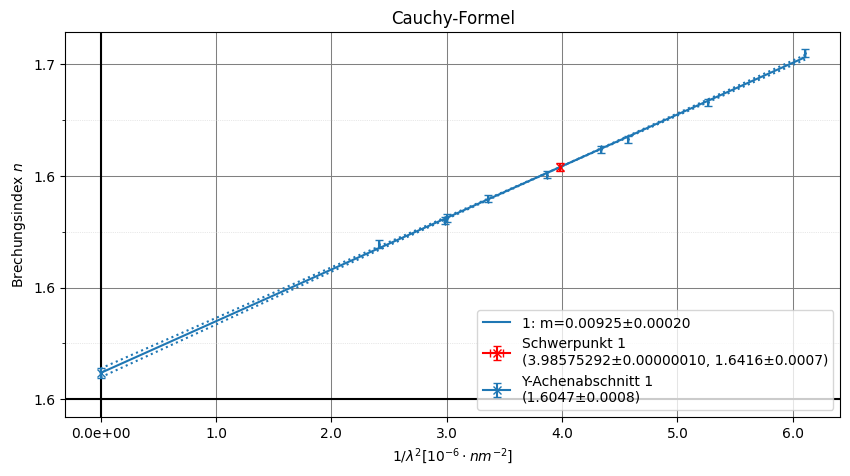

In [72]:
geraden_fit('e_werte_plot.csv', title='Cauchy-Formel', x_label=r'$1/\lambda^2 [10^{-6} \cdot nm^{-2}]$', y_label=r'Brechungsindex $n$', plot_formula=False,
			save=True, linear_fit=True, focus_point=True, plot_y_inter=True, legendlocation='lower right', y_decimal_places=3, x_axis=1.6, #x_axis=400,
			y_major_ticks=0.02, y_minor_ticks=0.01#, x_major_ticks=1, x_minor_ticks=0.5
			)

Daraus folgt, dass 

$A=\left| \frac{dn}{d\lambda} \right| \cdot B=\left| -2\cdot \frac{k_1}{\lambda^3} \right| \cdot B= \frac{2 \cdot m}{\lambda^3} \cdot B =\frac{\lambda}{\Delta \lambda}$

$\Leftrightarrow \Delta \lambda = \frac{\lambda}{A}$

mit $B \pm \Delta B = (1.8±0.3) \, cm = (0.018±0.003) \cdot 10^6 \, \mu m$ und $m \pm \Delta m = (0.00925±0.00020) \, \mu m^2$

folgt:

In [119]:
var_names=[m, B, lamb]=sp.symbols('m B lamb')
formula=2*m*B/lamb**3

gaussian_error_propagation(formula, ((m,0.00925,0.00020),(B,0.018e+6,0.003e+6), (lamb, 0.4, 0)))
print('\n')
gaussian_error_propagation(formula, ((m,0.00925,0.00020),(B,0.018e+6,0.003e+6), (lamb, 0.5, 0)))
print('\n')
gaussian_error_propagation(formula, ((m,0.00925,0.00020),(B,0.018e+6,0.003e+6), (lamb, 0.6, 0)))

Formel: 2*B*m/lamb**3
Werte: ((m, 0.00925, 0.0002), (B, 18000.0, 3000.0), (lamb, 0.4, 0)) 

Formelwert: 5203.12500000000

Fehlerformel: sqrt((2*B*del_m/lamb**3)**2 + (2*del_B*m/lamb**3)**2)
Fehler: 874.454349955588 
Ergebnis: 5200.0±900.0
Das Ergebnis hat eine Genauigkeit von 17.308%


Formel: 2*B*m/lamb**3
Werte: ((m, 0.00925, 0.0002), (B, 18000.0, 3000.0), (lamb, 0.5, 0)) 

Formelwert: 2664.00000000000

Fehlerformel: sqrt((2*B*del_m/lamb**3)**2 + (2*del_B*m/lamb**3)**2)
Fehler: 447.720627177261 
Ergebnis: 2700.0±400.0
Das Ergebnis hat eine Genauigkeit von 14.815%


Formel: 2*B*m/lamb**3
Werte: ((m, 0.00925, 0.0002), (B, 18000.0, 3000.0), (lamb, 0.6, 0)) 

Formelwert: 1541.66666666667

Fehlerformel: sqrt((2*B*del_m/lamb**3)**2 + (2*del_B*m/lamb**3)**2)
Fehler: 259.097585172026 
Ergebnis: 1500.0±300.0
Das Ergebnis hat eine Genauigkeit von 20.0%


In [97]:
var_names=[lamb, A]=sp.symbols('lamb A')
formula=lamb/A
gaussian_error_propagation(formula, ((lamb,400,0),(A,5200,900)))

print('\n')

gaussian_error_propagation(formula, ((lamb,500,0),(A,2700,400)))

print('\n')

gaussian_error_propagation(formula, ((lamb,600,0),(A,1500,300)))

Formel: lamb/A
Werte: ((lamb, 400, 0), (A, 5200, 900)) 

Formelwert: 0.0769230769230769

Fehlerformel: sqrt((-del_A*lamb/A**2)**2)
Fehler: 0.0133136094674556 
Ergebnis: 0.077±0.013
Das Ergebnis hat eine Genauigkeit von 16.883%


Formel: lamb/A
Werte: ((lamb, 500, 0), (A, 2700, 400)) 

Formelwert: 0.185185185185185

Fehlerformel: sqrt((-del_A*lamb/A**2)**2)
Fehler: 0.0274348422496571 
Ergebnis: 0.19±0.03
Das Ergebnis hat eine Genauigkeit von 15.789%


Formel: lamb/A
Werte: ((lamb, 600, 0), (A, 1500, 300)) 

Formelwert: 0.400000000000000

Fehlerformel: sqrt((-del_A*lamb/A**2)**2)
Fehler: 0.0800000000000000 
Ergebnis: 0.4±0.08
Das Ergebnis hat eine Genauigkeit von 20.0%
